# Analyze  NBA Player statistics

## Introduction

We analyze the 2017-2018 NBA players data. The data was downloaded from [basketball-reference](https://www.basketball-reference.com/).

## Project Goal

What you want to do with this project?

explain your ideas and goals here.

## Set up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Pick a style
plt.style.use('seaborn-darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams["font.family"] = "Times New Roman"

## Glossary

There are 30 columns in the dataset, and their meanings are listed as below. 

* Rk -- Rank (an unique index for each player, it may be duplicated if a player played for multiple teams in a single season).

* Player -- Player name.

* Pos -- Position.

* Age -- Age of Player at the start of February 1st of that season.

* Tm -- Team. 

* G -- Games.

* GS -- Games Started.

* MP -- Minutes Played Per Game.

* FG -- Field Goals Per Game.

* FGA -- Field Goal Attempts Per Game.

* FG% -- Field Goal Percentage.

* 3P -- 3-Point Field Goals Per Game.

* 3PA -- 3-Point Field Goal Attempts Per Game.

* 3P% -- FG% on 3-Pt FGAs.

* 2P -- 2-Point Field Goals Per Game.

* 2PA -- 2-Point Field Goal Attempts Per Game.

* 2P% -- FG% on 2-Pt FGAs.

* eFG% -- Effective Field Goal Percentage: This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.

* FT -- Free Throws Per Game.

* FTA -- Free Throw Attempts Per Game.

* FT% -- Free Throw Percentage.

* ORB -- Offensive Rebounds Per Game.

* DRB -- Defensive Rebounds Per Game.

* TRB -- Total Rebounds Per Game.

* AST -- Assists Per Game.

* STL -- Steals Per Game.

* BLK -- Blocks Per Game.

* TOV -- Turnovers Per Game.

* PF -- Personal Fouls Per Game.

* PS/G -- Points Per Game.

In [2]:
# load the per game stats for the 2017-2018 season players
data = pd.read_csv('./data/2017-18-NBA-Player-Stats-Per-Game.csv')
data.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1,Alex Abrines\abrinal01,SG,24,OKC,75,8,15.1,1.5,3.9,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,2,Quincy Acy\acyqu01,PF,27,BRK,70,8,19.4,1.9,5.2,...,0.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,3,Steven Adams\adamsst01,C,24,OKC,76,76,32.7,5.9,9.4,...,0.557,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,4,Bam Adebayo\adebaba01,C,20,MIA,69,19,19.8,2.5,4.9,...,0.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,5,Arron Afflalo\afflaar01,SG,32,ORL,53,3,12.9,1.2,3.1,...,0.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4


In [3]:
data.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PS/G      float64
dtype: object

## Data cleaning

In [96]:
# clean the 'Player' column
data['Player'] = data['Player'].apply(lambda x: x.split("\\")[0])


In [97]:
# the total number of players is 540
print(data['Rk'].max())
# the total number of rows is 664
print(data.shape)
# a few players played for multiple teams in a single season, only the first row should be used.
# for example, "Dwyane Wade", the first row is the sum of the rest rows for these players, we only take the 1st row
print(data[data["Player"]=="Dwyane Wade"])

data_players = pd.DataFrame()

for i in range(1,data['Rk'].max()+1): # the first Rank is "1", not "0"
    data_temp = data[data['Rk'] == i]
    # we only pick the first row of the temporary dataframe
    data_players=data_players.append(data_temp.iloc[0])[data_temp.columns.tolist()]

data_players.head()

540
(664, 30)
      Rk       Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...     FT%  \
608  495  Dwyane Wade  SG   36  TOT  67   3  22.9  4.5  10.2  ...   0.714   
609  495  Dwyane Wade  SG   36  CLE  46   3  23.2  4.3   9.5  ...   0.701   
610  495  Dwyane Wade  SG   36  MIA  21   0  22.2  4.8  11.8  ...   0.745   

     ORB  DRB  TRB  AST  STL  BLK  TOV   PF  PS/G  
608  0.7  3.0  3.8  3.4  0.9  0.7  2.1  1.9  11.4  
609  0.8  3.1  3.9  3.5  0.9  0.7  2.0  1.8  11.2  
610  0.5  2.9  3.4  3.1  0.9  0.7  2.3  1.9  12.0  

[3 rows x 30 columns]


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,1.0,Alex Abrines,SG,24.0,OKC,75.0,8.0,15.1,1.5,3.9,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,2.0,Quincy Acy,PF,27.0,BRK,70.0,8.0,19.4,1.9,5.2,...,0.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,3.0,Steven Adams,C,24.0,OKC,76.0,76.0,32.7,5.9,9.4,...,0.557,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,4.0,Bam Adebayo,C,20.0,MIA,69.0,19.0,19.8,2.5,4.9,...,0.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,5.0,Arron Afflalo,SG,32.0,ORL,53.0,3.0,12.9,1.2,3.1,...,0.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4


In [98]:
#data_players.reset_index(inplace=True, drop=True)
print(data_players)

        Rk                 Player Pos   Age   Tm     G    GS    MP   FG   FGA  \
0      1.0           Alex Abrines  SG  24.0  OKC  75.0   8.0  15.1  1.5   3.9   
1      2.0             Quincy Acy  PF  27.0  BRK  70.0   8.0  19.4  1.9   5.2   
2      3.0           Steven Adams   C  24.0  OKC  76.0  76.0  32.7  5.9   9.4   
3      4.0            Bam Adebayo   C  20.0  MIA  69.0  19.0  19.8  2.5   4.9   
4      5.0          Arron Afflalo  SG  32.0  ORL  53.0   3.0  12.9  1.2   3.1   
5      6.0           Cole Aldrich   C  29.0  MIN  21.0   0.0   2.3  0.2   0.7   
6      7.0      LaMarcus Aldridge   C  32.0  SAS  75.0  75.0  33.5  9.2  18.0   
7      8.0          Jarrett Allen   C  19.0  BRK  72.0  31.0  20.0  3.3   5.5   
8      9.0           Kadeem Allen  PG  25.0  BOS  18.0   1.0   5.9  0.3   1.2   
9     10.0             Tony Allen  SF  36.0  NOP  22.0   0.0  12.4  2.0   4.1   
10    11.0        Al-Farouq Aminu  PF  27.0  POR  69.0  67.0  30.0  3.3   8.4   
11    12.0        Justin And

In [99]:
# we will drop the "Tm" (Team) column, since "Tm" = "TOT" doesn't apply for players who played for multiple teams 
# we will also drop the "Rk" column
data_players = data_players.drop(['Rk', 'Tm'], axis=1)
print(data_players)

                    Player Pos   Age     G    GS    MP   FG   FGA    FG%   3P  \
0             Alex Abrines  SG  24.0  75.0   8.0  15.1  1.5   3.9  0.395  1.1   
1               Quincy Acy  PF  27.0  70.0   8.0  19.4  1.9   5.2  0.356  1.5   
2             Steven Adams   C  24.0  76.0  76.0  32.7  5.9   9.4  0.629  0.0   
3              Bam Adebayo   C  20.0  69.0  19.0  19.8  2.5   4.9  0.512  0.0   
4            Arron Afflalo  SG  32.0  53.0   3.0  12.9  1.2   3.1  0.401  0.5   
5             Cole Aldrich   C  29.0  21.0   0.0   2.3  0.2   0.7  0.333  0.0   
6        LaMarcus Aldridge   C  32.0  75.0  75.0  33.5  9.2  18.0  0.510  0.4   
7            Jarrett Allen   C  19.0  72.0  31.0  20.0  3.3   5.5  0.589  0.1   
8             Kadeem Allen  PG  25.0  18.0   1.0   5.9  0.3   1.2  0.273  0.0   
9               Tony Allen  SF  36.0  22.0   0.0  12.4  2.0   4.1  0.484  0.2   
10         Al-Farouq Aminu  PF  27.0  69.0  67.0  30.0  3.3   8.4  0.395  1.8   
11         Justin Anderson  

In [100]:
# drop rows if "PS/G" equal to "0.0"
#data_players[data_players["PS/G"] == 0.0]
data_players= data_players[data_players["PS/G"] > 0.0]
data_players.shape

(529, 28)

In [101]:
data_players.isnull().sum()

Player     0
Pos        0
Age        0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%       44
2P         0
2PA        0
2P%        6
eFG%       0
FT         0
FTA        0
FT%       28
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PS/G       0
dtype: int64

In [102]:
# columns having nan data include:  3P%, FT%
# replace "FT%" NaN as "0.0", which means that the player never got a chance for free show "FT" and "3P%"
data_players=data_players.fillna(0)
#data_players.isnull().sum() # double check


In [103]:
data_players['Pos'].value_counts()

SG       125
PG       111
C        105
PF       101
SF        84
SF-SG      2
PG-SG      1
Name: Pos, dtype: int64

In [104]:
# replace two-postion players postion with the first one
data_players['Pos']=data_players['Pos'].replace(['SF-SG'], 'SF')
data_players['Pos']=data_players['Pos'].replace(['PG-SG'], 'PG')
data_players['Pos'].value_counts()
data_players.shape

(529, 28)

In [105]:
# we'd better consider players who have played more than 8 games through the season(82 * 10%), total 82 games.
print(len(data_players[data_players['G']<= 8]))
players_below_8games = data_players[data_players['G']<= 8]
players_above_8games =  data_players[data_players['G']> 8]
players_above_8games['Pos'].value_counts()

56


SG    108
C      98
PG     98
PF     88
SF     81
Name: Pos, dtype: int64

In [106]:
# we will map our label string to numeric numbers
Pos_dict = {
    "SG": 1,
    "PG": 2,
    "C": 3,
    "PF": 4,
    "SF": 5
}
data_players['Pos']=data_players['Pos'].map(Pos_dict)
data_players['Pos']=data_players['Pos'].astype('int64')
data_players

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,Alex Abrines,1,24.0,75.0,8.0,15.1,1.5,3.9,0.395,1.1,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,Quincy Acy,4,27.0,70.0,8.0,19.4,1.9,5.2,0.356,1.5,...,0.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,Steven Adams,3,24.0,76.0,76.0,32.7,5.9,9.4,0.629,0.0,...,0.557,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,Bam Adebayo,3,20.0,69.0,19.0,19.8,2.5,4.9,0.512,0.0,...,0.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,Arron Afflalo,1,32.0,53.0,3.0,12.9,1.2,3.1,0.401,0.5,...,0.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4
5,Cole Aldrich,3,29.0,21.0,0.0,2.3,0.2,0.7,0.333,0.0,...,0.333,0.1,0.6,0.7,0.1,0.1,0.0,0.0,0.5,0.6
6,LaMarcus Aldridge,3,32.0,75.0,75.0,33.5,9.2,18.0,0.510,0.4,...,0.837,3.3,5.2,8.5,2.0,0.6,1.2,1.5,2.2,23.1
7,Jarrett Allen,3,19.0,72.0,31.0,20.0,3.3,5.5,0.589,0.1,...,0.776,2.0,3.4,5.4,0.7,0.4,1.2,1.1,2.0,8.2
8,Kadeem Allen,2,25.0,18.0,1.0,5.9,0.3,1.2,0.273,0.0,...,0.778,0.2,0.4,0.6,0.7,0.2,0.1,0.5,0.8,1.1
9,Tony Allen,5,36.0,22.0,0.0,12.4,2.0,4.1,0.484,0.2,...,0.524,0.9,1.2,2.1,0.4,0.5,0.1,0.9,2.2,4.7


## Data collinearity

We note that there is a [data collinearity](https://en.wikipedia.org/wiki/Multicollinearity) issue in the raw data. Data collinearity means that one variable can be predicted by other variable in the data. For our case, we know that (See the "Glossary" section for definition): 
* FT% = FT/FTA

* FG% = FG / FGA

* 3P% = 3P/3PA

* 2P% = 2P/2PA

* TRB = ORB + DRB

* eFG% = (FG + 0.5*3P)/FGA

* PS/G = 3P\*3 + 2P\*2

Let's confirm the issue by checking the correlation coefficients between them.


In [122]:
data_corr = data_players['FT%'].corr(data_players['FTA'])
data_corr

0.3168433080306014

In [121]:
data_players.iloc[10]

Player    Al-Farouq Aminu
Pos                     4
Age                    27
G                      69
GS                     67
MP                     30
FG                    3.3
FGA                   8.4
FG%                 0.395
3P                    1.8
3PA                   4.9
3P%                 0.369
2P                    1.5
2PA                   3.5
2P%                 0.432
eFG%                0.503
FT                    0.9
FTA                   1.2
FT%                 0.738
ORB                   1.4
DRB                   6.2
TRB                   7.6
AST                   1.2
STL                   1.1
BLK                   0.6
TOV                   1.1
PF                      2
PS/G                  9.3
Name: 10, dtype: object

## Exploratory Data Analysis

In [107]:
# https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f456adce860>]],
      dtype=object)

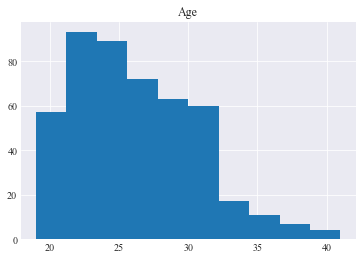

In [108]:
players_above_8games.hist(column='Age')

In [110]:
#pd.pivot_table(data=players_above_8games, index='Age', values='Pos')

DataError: No numeric types to aggregate

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f456b1fd0f0>]],
      dtype=object)

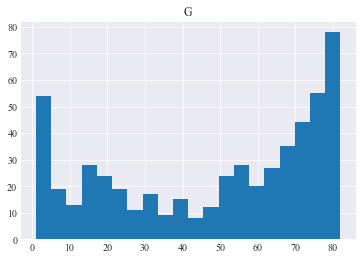

In [72]:
    data_players.hist(column='G', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f456b0ad390>]],
      dtype=object)

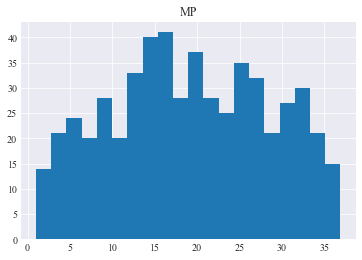

In [73]:
data_players.hist(column='MP', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f456b0bb630>]],
      dtype=object)

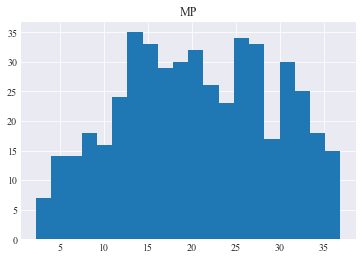

In [74]:
players_above_8games.hist(column='MP', bins=20)

** Normalization in Pandas**

* to use mean normalization:

normalized_df=(df-df.mean())/df.std()

* to use min-max normalization:

normalized_df=(df-df.min())/(df.max()-df.min())